In [1]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import dill
from scipy.stats import pearsonr
import math
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
# functions
def V_cramer(tab, n):
    # Initiating objects
    nrow, ncol = tab.shape
    resultats_test = chi2_contingency(tab)
    statistique = resultats_test[0]
    # Computing objects
    r = ncol - (((ncol - 1) **  2) / (n - 1))
    k = nrow - (((nrow - 1) **  2) / (n - 1))
    phi_squared = max(0, ((statistique / n) - (((ncol - 1) * (nrow - 1)) / (n - 1))))
    V = math.sqrt((phi_squared / (min(k - 1, r - 1))))
    return V

In [3]:
##### Import of tables into dataframes
#dfLieux = pd.read_csv('20220906_table_lieux.csv', sep=',')
dfUsagers = pd.read_csv('20220906_table_usagers.csv', sep=',')
dfUsagers = dfUsagers.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
dfVehicules = pd.read_csv('20220906_table_vehicules.csv', sep=',')
dfVehicules = dfVehicules.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
#dfCarac = pd.read_csv('20220906_table_caracteristiques.csv', sep=',')


C:\Users\possard\AppData\Local\Temp\ipykernel_5400\34221396.py:3: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsagers = pd.read_csv('20220906_table_usagers.csv', sep=',')
C:\Users\possard\AppData\Local\Temp\ipykernel_5400\34221396.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfVehicules = pd.read_csv('20220906_table_vehicules.csv', sep=',')


In [4]:
#print('dfLieux dimensions:', dfLieux.shape)
print('dfUsagers dimensions:', dfUsagers.shape)
print('dfVehicules dimensions:', dfVehicules.shape)
#print('dfCarac dimensions:', dfCarac.shape)
# print('dfPool dimensions:', dfPool.shape)

dfUsagers dimensions: (2380467, 17)
dfVehicules dimensions: (1817587, 12)


# Descriptive Statistics

## Tables des usagers

In [5]:
dfUsagers['place']=dfUsagers['place'].astype('Int32')
dfUsagers['secu'] =dfUsagers['secu'].astype('Int32')
#dfUsagers['an_nais']=dfUsagers['an_nais'].astype('Int32')
dfUsagers['locp'] =dfUsagers['locp'].astype('Int32')
dfUsagers['etatp']=dfUsagers['etatp'].astype('Int32')
dfUsagers['secu1']=dfUsagers['secu1'].astype('Int32')
dfUsagers['secu2']=dfUsagers['secu2'].astype('Int32')
dfUsagers['secu3']=dfUsagers['secu3'].astype('Int32')

dfUsagers['actp']=dfUsagers['actp'].astype(str)
dfUsagers['actp']=dfUsagers['actp'].str.replace('.0','')

dfUsagers.info()
dfUsagers.head()

C:\Users\possard\AppData\Local\Temp\ipykernel_5400\1818558568.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dfUsagers['actp']=dfUsagers['actp'].str.replace('.0','')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380467 entries, 0 to 2380466
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        Int32  
 2   catu         int64  
 3   grav         int64  
 4   sexe         int64  
 5   trajet       float64
 6   secu         Int32  
 7   locp         Int32  
 8   actp         object 
 9   etatp        Int32  
 10  an_nais      float64
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        Int32  
 14  secu2        Int32  
 15  secu3        Int32  
 16  grav2        int64  
dtypes: Int32(7), float64(2), int64(5), object(3)
memory usage: 261.1+ MB


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,grav2
0,201600000001,1,1,1,2,0.0,11,0,0,0,1983.0,B02,NaN,<NA>,<NA>,<NA>,1
1,201600000001,1,1,3,1,9.0,21,0,0,0,2001.0,A01,NaN,<NA>,<NA>,<NA>,3
2,201600000002,1,1,3,1,5.0,11,0,0,0,1960.0,A01,NaN,<NA>,<NA>,<NA>,3
3,201600000002,2,2,3,1,0.0,11,0,0,0,2000.0,A01,NaN,<NA>,<NA>,<NA>,3
4,201600000002,3,2,3,2,0.0,11,0,0,0,1962.0,A01,NaN,<NA>,<NA>,<NA>,3


In [6]:
### Proportion of NA by variable
dfUsagers.isnull().sum() * 100 / len(dfUsagers)

Num_Acc         0.000000
place           5.172430
catu            0.000000
grav            0.000000
sexe            0.000000
trajet          0.020752
secu           12.384503
locp            2.367645
actp            0.000000
etatp           2.370039
an_nais         0.101577
num_veh         0.000000
id_vehicule    89.990535
secu1          89.990535
secu2          89.990535
secu3          89.990535
grav2           0.000000
dtype: float64

In [7]:
# Number of modalities by variable
#print('Num_Acc', len(dfUsagers.Num_Acc.value_counts()))
print('place', len(dfUsagers.place.value_counts()))
#print('catu', len(dfUsagers.catu.value_counts()))
#print('grav', len(dfUsagers.grav.value_counts()))
#print('sexe', len(dfUsagers.sexe.value_counts()))
#print('trajet', len(dfUsagers.trajet.value_counts()))
print('secu', len(dfUsagers.secu.value_counts()))
print('locp', len(dfUsagers.locp.value_counts()))
print('actp', len(dfUsagers.actp.value_counts()))
print('etatp', len(dfUsagers.etatp.value_counts()))
print('an_nais', len(dfUsagers.an_nais.value_counts()))
#print('num_veh', len(dfUsagers.num_veh.value_counts()))
#print('id_vehicule', len(dfUsagers.id_vehicule.value_counts()))
print('secu1', len(dfUsagers.secu1.value_counts()))
print('secu2', len(dfUsagers.secu2.value_counts()))
print('secu3', len(dfUsagers.secu3.value_counts()))
print('grav2', len(dfUsagers.grav2.value_counts()))



place 11
secu 24
locp 11
actp 14
etatp 5
an_nais 125
secu1 11
secu2 11
secu3 11
grav2 4


###  GRAPHS

#### Distribution des variables

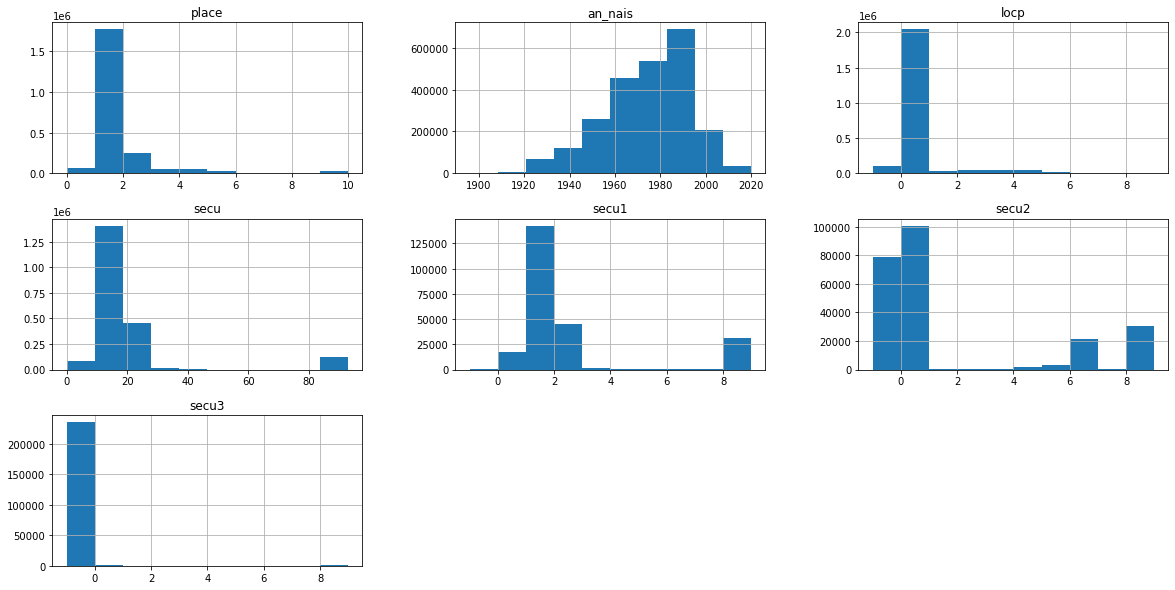

In [8]:
dfUsagers[['place','an_nais','locp','secu','secu1','secu2','secu3']].hist(figsize=(20, 10));
#dfUsagers['actp'].hist(figsize=(20, 10))



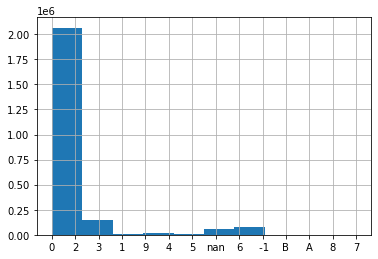

In [9]:
#dfUsagers['actp'].unique()
dfUsagers['actp'].hist();


C:\Users\possard\AppData\Local\Temp\ipykernel_5400\4102236072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['an_10']=10*dfUsagers['an_nais'].floordiv(10)


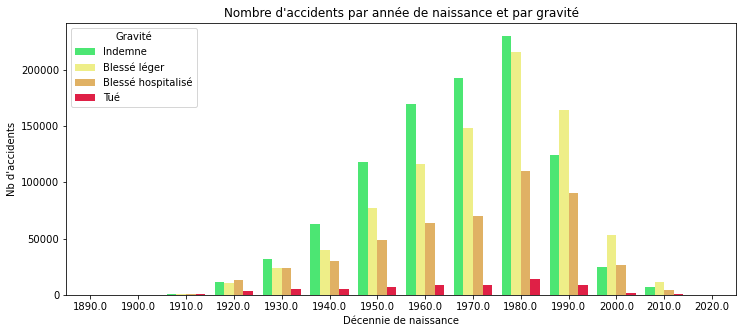

In [10]:
#nbre d'accidents par année de nais. et par gravité
df=dfUsagers[['Num_Acc','an_nais','grav2']]
df['an_10']=10*dfUsagers['an_nais'].floordiv(10)

plt.figure(figsize=(12,5))
ax=sns.countplot(x='an_10',data=df,palette=['#33FF66','#FFFF77','#F4B650','#FF0033'],hue='grav2')
ax.set_xlabel("Décennie de naissance", fontsize = 10)
ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par année de naissance et par gravité");

ax.legend(title='Gravité', loc='upper left', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé','Tué']);

In [11]:
# Gravity variable in Usagers dataframe
pd.DataFrame({'prop':dfUsagers.grav2.value_counts(normalize=True),
              'count':dfUsagers.grav2.value_counts()})

,prop,count
1,0.409152,973973
2,0.361345,860171
3,0.202676,482464
4,0.026826,63859


## Table des Véhicules

In [12]:
dfVehicules.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav
0,201600000001,0.0,7,0.0,0.0,0.0,1.0,1.0,B02,NaN,NaN,3
1,201600000001,0.0,2,0.0,0.0,0.0,7.0,15.0,A01,NaN,NaN,3
2,201600000002,0.0,7,0.0,6.0,0.0,1.0,1.0,A01,NaN,NaN,3
3,201600000003,0.0,7,0.0,0.0,1.0,6.0,1.0,A01,NaN,NaN,3
4,201600000004,0.0,32,0.0,0.0,0.0,1.0,1.0,B02,NaN,NaN,3


In [13]:
dfVehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817587 entries, 0 to 1817586
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   senc         float64
 2   catv         int64  
 3   occutc       float64
 4   obs          float64
 5   obsm         float64
 6   choc         float64
 7   manv         float64
 8   num_veh      object 
 9   id_vehicule  object 
 10  motor        float64
 11  grav         int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 166.4+ MB


In [14]:
### Proportion of NA by variable
dfVehicules.isnull().sum() * 100 / len(dfVehicules)

Num_Acc         0.000000
senc            0.014965
catv            0.000000
occutc          9.917710
obs             0.055348
obsm            0.042804
choc            0.021842
manv            0.025748
num_veh         0.000000
id_vehicule    89.999048
motor          89.999048
grav            0.000000
dtype: float64

In [15]:
# Number of modalities by variable
print('Num_Acc', len(dfVehicules.Num_Acc.value_counts()))
print('senc', len(dfVehicules.senc.value_counts()))
print('catv', len(dfVehicules.catv.value_counts()))
print('occutc', len(dfVehicules.occutc.value_counts()))
print('obs', len(dfVehicules.obs.value_counts()))
print('obsm', len(dfVehicules.obsm.value_counts()))
print('choc', len(dfVehicules.choc.value_counts()))
print('manv', len(dfVehicules.manv.value_counts()))
print('num_veh', len(dfVehicules.num_veh.value_counts()))
#print('id_vehicule', len(dfVehicules.id_vehicule.value_counts()))
print('motor', len(dfVehicules.motor.value_counts()))
print('grav', len(dfVehicules.grav.value_counts()))


Num_Acc 1065053
senc 5
catv 41
occutc 124
obs 19
obsm 8
choc 11
manv 28
num_veh 175
motor 8
grav 3


###  GRAPHS

#### Distributions des variables

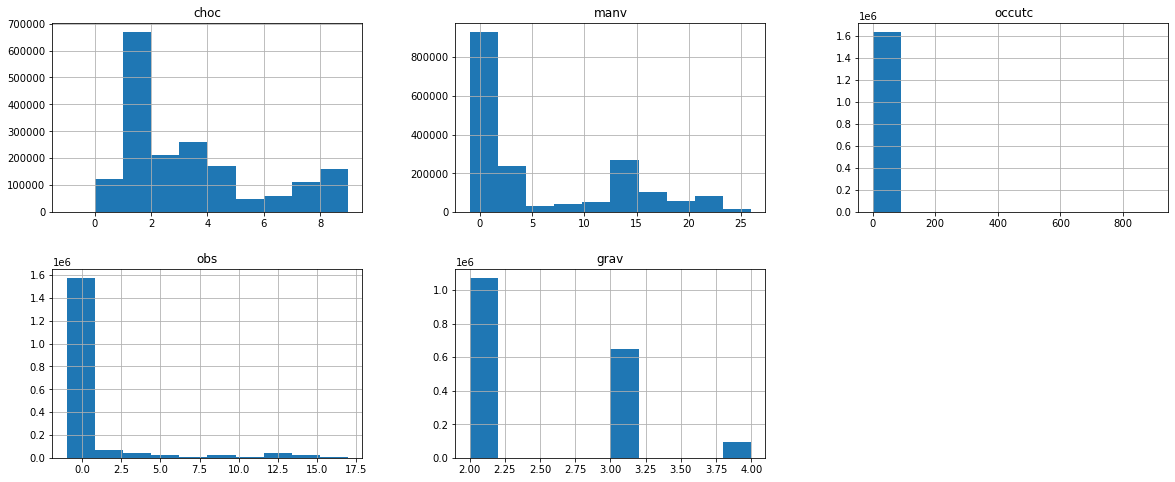

In [16]:

dfVehicules[['choc','manv','occutc','obs','num_veh','grav']].hist(figsize=(20, 8), layout=(2, 3));


In [17]:
# Gravity variable in dfVehicules dataframe
pd.DataFrame({'prop':dfVehicules.grav.value_counts(normalize=True),
              'count':dfVehicules.grav.value_counts()})

,prop,count
2,0.590521,1073323
3,0.357891,650498
4,0.051588,93766


# Graphs pertinants
- Table Usagers-

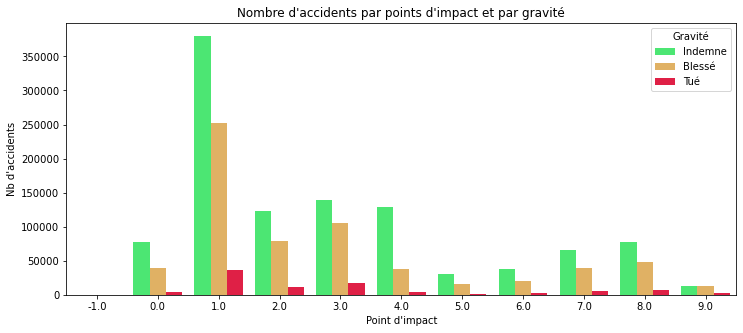

In [43]:
#nbre d'accidents par point d'impact et par gravité
df_choc=dfVehicules[['Num_Acc','choc','grav']]

plt.figure(figsize=(12,5))
ax=sns.countplot(x='choc',data=df_choc,palette=['#33FF66','#F4B650','#FF0033'],hue='grav')
ax.set_xlabel("Point d'impact", fontsize = 10)
ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par points d'impact et par gravité");

ax.legend(title='Gravité', loc='upper right', labels=['Indemne','Blessé', 'Tué']);

In [41]:
#dfVehicules['grav'].unique()
df=df_choc[(df_choc['choc']==1) & (df_choc['grav']==2)]
df

,Num_Acc,choc,grav
76,201600000050,1.0,2
155,201600000101,1.0,2
157,201600000101,1.0,2
170,201600000110,1.0,2
176,201600000115,1.0,2
...,...,...,...
1817570,202000047736,1.0,2
1817578,202000047740,1.0,2
1817580,202000047741,1.0,2
1817585,202000047743,1.0,2
